In [19]:
from numpy import *
from GRpy.all import *
init_printing()
#init_printing(use_latex='mathjax')

In [20]:
t, x0, r, th, phi = symbols('t, x^0, r, theta, varphi',positive=True , real=True)
m,a = symbols('m,a', positive = True)
ut, uphi = symbols('u_t, u_phi', real=True)
p3, sp2 = symbols(r'p^{\phi}, S^{\theta}', real=True)
M = Symbol('M', real=True)

s = Symbol('s', real=True)

pt = Function(r'p^t')(s)
pr = Function(r'p^r')(s)
ptheta = Function(r'p^{\theta}')(s)
pphi = Function(r'p^{\phi}')(s)

st = Function(r'S^t')(s)
sr = Function(r'S^r')(s)
stheta = Function(r'S^{\theta}')(s)
sphi = Function(r'S^{\phi}')(s)

In [21]:
sigma = r**2 + (a*cos(th))**2
delta = r**2 - 2*m*r + a**2

In [22]:
g = Metric((x0, r, th, phi))
g[-0,-0] = (1-(2*m*r/sigma))
g[-0,-1] = 0
g[-0,-2] = 0
g[-0,-3] = (2*a*m*r*sin(th)**2)/sigma
g[-1,-0] = 0
g[-1,-1] = -sigma/delta
g[-1,-2] = 0
g[-1,-3] = 0
g[-2,-0] = 0
g[-2,-1] = 0
g[-2,-2] = -sigma
g[-2,-3] = 0
g[-3,-0] = (2*a*m*r*sin(th)**2)/sigma
g[-3,-1] = 0
g[-3,-2] = 0
g[-3,-3] = -(r**2 +a**2 + (2*a**2*m*r*sin(th)**2)/sigma)*sin(th)**2

In [23]:
ginv = g.invert()

In [24]:
chris = Christoffel(g)

In [25]:
def dw(A,mu):
    downvector=0
    for nu in range(4):
        downvector += g.components[(-mu,-nu)]*A[nu]
    
    return simplify(downvector.subs(th,pi/2))

def down(A):
    return [dw(A,mu) for mu in range(4)]

In [26]:
sup=[st,sr,stheta,sphi]
pup=[pt,pr,ptheta,pphi]

In [28]:
uphi=a/(a**2+r**2)*ut
uupnonorm=[ut,0,0,uphi]

N=0
for i in range(4):
    for j in range(4):
        N += g.components[(-i,-j)]*uupnonorm[i]*uupnonorm[j]
        
eq=1-N.subs(th,pi/2)

utnorm=solve(eq,ut)[1]
uphinorm=a/(a**2+r**2)*utnorm
uup=[utnorm,0,0,uphinorm]
udown=down(uup)

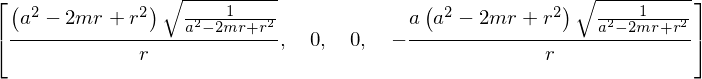

In [65]:
udown

In [29]:
def ch(mu):
    ch=0
    for i in range(4):
        for j in range(4):
            ch += chris.components[(mu,-i,-j)]*uup[i]*pup[j]
        
    return ch

def dpmu(mu):
    A=simplify(ch(mu).subs(th,pi/2))
    return diff(pup[mu],s)+A

dpmu=[dpmu(0),dpmu(1),dpmu(2),dpmu(3)]

In [30]:
sdown=down(sup)

c2=0
for i in range(4):
    for j in range(4):
        for k in range(4):
            c2 += chris.components[(i,-j,-k)]*sdown[i]*uup[j]*uup[k]
            
def c3(mu):
    c=0
    for i in range(4):
        for j in range(4):
            c += chris.components[(mu,-i,-j)]*sup[i]*uup[j]
    
    return c

def dsmu(mu):
    A=c3(mu)+uup[mu]*c2
    B=simplify(A.subs(th,pi/2))
    return diff(sup[mu],s)+B
    
dsmu=[dsmu(0),dsmu(1),dsmu(2),dsmu(3)]

In [31]:
dpmu2=[dpmu[0],dpmu[1],dpmu[3]]
psol=dsolve(dpmu2)

dsmu2=[dsmu[0],dsmu[1],dsmu[3]]
ssol=dsolve(dsmu2)

In [38]:
supsol = [ssol[0].rhs,ssol[1].rhs,sp2,ssol[2].rhs]

condicion=0
for i in range(4):
    condicion += supsol[i]*udown[i]

print('la condicion a satisfacer es:',simplify(condicion))

la condicion a satisfacer es: C1*a*(a**2 - 2*m*r + r**2)*sqrt(1/(a**2 - 2*m*r + r**2))/m


In [39]:
pupsol = [psol[0].rhs, psol[1].rhs ,p3, psol[2].rhs]
sdownsol=down(supsol)

In [40]:
def lcup(i,j,k,l):
    return LeviCivita(i,j,k,l)/(r**2)

def termino(mu):
    termino=0
    for nu in range(4):
        for alpha in range(4):
            for beta in range(4):
                for sigma in range(4):
                    for rho in range(4):
                        termino += lcup(mu,nu,alpha,beta)*chris.components[(rho,-nu,-sigma)]*udown[rho]*uup[sigma]*sdownsol[beta]*udown[alpha]
                        
    return termino

Masa=0
for mu in range(4):
    Masa += pupsol[mu]*udown[mu]

def p(mu):
    A=Masa*uup[mu]+termino(mu)
    return simplify(A.subs(th,pi/2))

momentum=[p(mu) for mu in range(4)]

In [43]:
print(pupsol[1], momentum[1])

C2*sqrt((-a**2 + m**2)/(a**2 - 2*m*r + r**2))*(-a**4 + 4*a**2*m*r - 2*a**2*r**2 - 4*m**2*r**2 + 4*m*r**3 - r**4)*sqrt(1/(a**2 - 2*m*r + r**2))*exp(s*sqrt((-a**2 + m**2)/(a**2 - 2*m*r + r**2))/r)/(a*(-m + r)) + C3*sqrt((-a**2 + m**2)/(a**2 - 2*m*r + r**2))*(a**4 - 4*a**2*m*r + 2*a**2*r**2 + 4*m**2*r**2 - 4*m*r**3 + r**4)*sqrt(1/(a**2 - 2*m*r + r**2))*exp(-s*sqrt(-(a**2 - m**2)/(a**2 - 2*m*r + r**2))/r)/(a*(-m + r)) 0


In [44]:
print(pupsol[2], momentum[2])

p^{\phi} (C1*a**4 - 2*C1*a**2*m*r + C1*m**2*r**2 - C2*a**2*m*r*cos(a*s/r**2) + C2*m**2*r**2*cos(a*s/r**2) - C3*a**2*m*r*sin(a*s/r**2) + C3*m**2*r**2*sin(a*s/r**2))*sqrt(1/(a**2 - 2*m*r + r**2))/(m*r**3)


De la componente $1$ o $r$ podemos notar que $C_2$ y $C_3$ en la solución del momentum deben ser 0 para que pueda satisfacerse la igualdad, mientras que de la componente $2$ o $\theta$ damos cuenta que para que $p^2$ sea constante, entonces $C_2$ y $C_3$ del spin deben ser $0$, ya que por la condición de ortogonalidad entre la cuadri-velocidad y el cuadri-spin $C_1$ ya es $0$.

Así, las soluciones para el momentum y el spín deben tener la forma:
\begin{align}
p^{\mu} &= [p^{\phi} \frac{a(m+r)}{m}, 0, 0, p^{\phi}],\\
S^{\mu} &= [0,0,S^{\theta},0].
\end{align}

In [45]:
pmu=[p3*a*(m+r)/m,0,0,p3]
smu=[0,0,sp2,0]
smudown=down(smu)

def t(mu):
    termino=0
    
    for nu in range(4):
        for alpha in range(4):
            for beta in range(4):
                for sigma in range(4):
                    for rho in range(4):
                        termino += lcup(mu,nu,alpha,beta)*chris.components[(rho,-nu,-sigma)]*udown[rho]*uup[sigma]*smudown[beta]*udown[alpha]
                        
    return termino
                        

Masa2=0
for mu in range(4):
    Masa2 += pmu[mu]*udown[mu]

def p2(mu):
    A=Masa2*uup[mu]+t(mu)
    return simplify(A.subs(th,pi/2))

pmu2=[p2(mu) for mu in range(4)]

In [46]:
0==pmu[1], pmu[1]==pmu2[1], 0==pmu[2], pmu[2]==pmu2[2]

(True, True, True, True)

In [49]:
print(pmu[0],simplify(pmu2[0]))

a*p^{\phi}*(m + r)/m S^{\theta}*a**3*sqrt(1/(a**2 - 2*m*r + r**2))/r**2 - S^{\theta}*a*m*sqrt(1/(a**2 - 2*m*r + r**2))/r + a**3*p^{\phi}/(m*r) + a*p^{\phi}*r/m


In [50]:
print(pmu[3],simplify(pmu2[3]))

p^{\phi} S^{\theta}*a**2*sqrt(1/(a**2 - 2*m*r + r**2))/r**2 - S^{\theta}*m*sqrt(1/(a**2 - 2*m*r + r**2))/r + a**2*p^{\phi}/(m*r)


In [54]:
eq1=pmu[0]-simplify(pmu2[0])
eq2=pmu[3]-simplify(pmu2[3])
eqtotal=[eq1,eq2]

print(solve(eqtotal,[sp2,p3]))

{S^{\theta}: -p^{\phi}*r/(m*sqrt(1/(a**2 - 2*m*r + r**2)))}


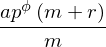

In [55]:
simplify(pmu2[0].subs(sp2,spin))

De esta forma, encontramos que la única solución posible es:
\begin{align}
p^{\mu} &= \left[ p^{\phi} \frac{a(m+r)}{m},\quad 0,\quad 0,\quad p^{\phi} \right],\\
S^{\mu} &= \left[0,\quad 0,\quad -\frac{p^{\phi} \sqrt{a^2+r^2-2mr}}{mr},\quad 0\right].
\end{align}

In [56]:
p=solve(eq,p3)[0]

pmu = [p*a*(m+r)/m,0,0,p]
print(pmu)

[-S^{\theta}*a*(m + r)*sqrt(1/(a**2 - 2*m*r + r**2))/r, 0, 0, -S^{\theta}*m*sqrt(1/(a**2 - 2*m*r + r**2))/r]


In [61]:
masaspin = 0
for mu in range(4):
    masaspin += pmu[mu]*udown[mu]
    
print(simplify(masaspin))

-S^{\theta}*a/r


Escribiendo dicha solución en términos de $S$ se tiene que:
\begin{align}
p^{\mu} &= \left [ - \frac{S^{\theta} a \left(m + r\right) \sqrt{\frac{1}{a^{2} - 2 m r + r^{2}}}}{r}, \quad 0, \quad 0, \quad - \frac{S^{\theta} m \sqrt{\frac{1}{a^{2} - 2 m r + r^{2}}}}{r}\right ],\\
S^{\mu} &= \left [ 0, \quad 0, \quad S^{\theta}, \quad 0\right ].
\end{align}

In [62]:
spin2=spin

pmu =[p3*a*(m+r)/m,0,0,p3]
smu=[0,0,spin2,0]
smudown=down(smu)

def t(mu):
    termino=0
    
    for nu in range(4):
        for alpha in range(4):
            for beta in range(4):
                for sigma in range(4):
                    for rho in range(4):
                        termino += lcup(mu,nu,alpha,beta)*chris.components[(rho,-nu,-sigma)]*udown[rho]*uup[sigma]*smudown[beta]*udown[alpha]
                        
    return termino
                        

Masa3=0
for mu in range(4):
    Masa3 += pmu[mu]*udown[mu]

def p4(mu):
    A=Masa3*uup[mu]+t(mu)
    return simplify(A.subs(th,pi/2))

pmu3=[p4(mu) for mu in range(4)]

pmu==pmu3

True

In [63]:
eq4=M-simplify(Masa3)
pm=solve(eq4,p3)[0]

pmu=[pm*a*(m+r)/m,0,0,pm]
print(pmu)

[M*(m + r)/((a**2 - 2*m*r + r**2)*sqrt(1/(a**2 - 2*m*r + r**2))), 0, 0, M*m/(a*(a**2 - 2*m*r + r**2)*sqrt(1/(a**2 - 2*m*r + r**2)))]


In [64]:
smu=[0,0,spin2.subs(p3,pm),0]
print(smu)

[0, 0, -M*r*(a**2 - 2*m*r + r**2)/(a*(a**2 - 2*m*r + r**2)), 0]


Escribiendo el momentum y el spin en términos de la masa $M = p^{\mu}u_{\mu}$, es obtiene que:
\begin{align}
p^{\mu} &= \left [ \frac{M \left(m + r\right)}{\left(a^{2} - 2 m r + r^{2}\right) \sqrt{\frac{1}{a^{2} - 2 m r + r^{2}}}}, \quad 0, \quad 0, \quad \frac{M m}{a \left(a^{2} - 2 m r + r^{2}\right) \sqrt{\frac{1}{a^{2} - 2 m r + r^{2}}}}\right ],\\
S^{\mu} &= \left [ 0, \quad 0, \quad - \frac{Mr}{a}, \quad 0\right ].
\end{align}

También podemos escribir las soluciones en términos del spín, teniendo así que: